In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Do

[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package reuter

[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package perluniprops to C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Josue-
[nltk_data]    |     Gaming\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-da

True

## Reading File and creating DataFrame

In [19]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pickle

In [4]:
# import pandas as pd
# wiki_files = pd.read_csv('wiki_sample.csv')
# wiki_dataframe = pd.DataFrame(wiki_files)
# wiki_dataframe

## Preprocessing and Creating Vocab

In [235]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))
for domain_stop_word in domain_stop_words:
    stop_words.add(domain_stop_word)

In [236]:
len(set(stopwords.words('english')))

179

In [237]:
len(stop_words)

10179

In [238]:
# lemmatizaiton, lowercase, remove non alphanumeric, and stopword removal
def apply_function(row, lenTitle):
    filtered_content = []
    for token in nltk.word_tokenize(row['content'][lenTitle:]):
        token = lemmatizer.lemmatize(token).lower()
        if token not in stop_words and token.isalnum():
           filtered_content.append(token) 
        
    return filtered_content

In [239]:
wiki_dataframe_pickle['tokenized_content'] = wiki_dataframe_pickle.progress_apply(lambda row: apply_function(row, len(row['title'])), axis=1)

100%|███████████████████████████████████████████████████████████████████████| 1286264/1286264 [34:42<00:00, 617.59it/s]


In [266]:
wiki_dataframe_pickle.to_pickle('./wiki_dataframe_with__10000_domain_stop_words')


KeyboardInterrupt: 

In [4]:
# import pickle5 as pickle
# with open("./wiki_dataframe", "rb") as pickle_file:
#   wiki_dataframe_pickle = pickle.load(pickle_file)
wiki_dataframe_pickle = pd.read_pickle('wiki_dataframe_with__1000_domain_stop_words.pkl')

In [5]:
wiki_dataframe_pickle

,content,title,id,tokenized_content
0,Morocco–Saudi Arabia relations\r\n\r\nMoroccan...,Morocco–Saudi Arabia relations,1,"[arabian, relation, refers, relation, morocco,..."
1,Anthony United States Post Office\r\n\r\nThe A...,Anthony United States Post Office,2,"[anthony, register, places, anthony, 121, stea..."
2,Dumraon (Vidhan Sabha constituency)\r\n\r\nDum...,Dumraon Vidhan Sabha constituency,3,"[dumraon, vidhan, sabha, constituency, 243, le..."
3,Chaker Khazaal\r\n\r\nChaker Khazaal (born 28 ...,Chaker Khazaal,4,"[chaker, khazaal, beirut, lebanon, reporter, p..."
4,Vicente Pascual Pastor\r\n\r\nVicente Pascual ...,Vicente Pascual Pastor,5,"[vicente, pascual, pastor, alcoy, 1865, alcoy,..."
...,...,...,...,...
1286259,Toppr\r\n\r\nToppr is a product of Haygot Educ...,Toppr,1286260,"[toppr, haygot, zishaan, hayath, hemanth, gote..."
1286260,Outline of education\r\n\r\nThe following outl...,Outline of education,1286261,"[outline, overview, topical, guide, sense, exp..."
1286261,Raell Padamsee\r\n\r\nRaell Padamsee is an Ind...,Raell Padamsee,1286262,"[raell, padamsee, personality, ceo, managing, ..."
1286262,Megan Callaway\r\n\r\nMegan Callaway is a foun...,Megan Callaway,1286263,"[megan, callaway, archer, girls, advocate, fun..."


In [277]:
len(wiki_dataframe_pickle['tokenized_content'][1286263])

4

## Creating Part of Inverted Index

In [6]:
from collections import defaultdict

inv_idx = defaultdict(list)
vocab = set()
heaps_law_dataset = list()

i = 0
id = 1
total_words = 0
count = 0
count2 = list() #number of times len(vocab) - past_unique_words is consistently less than 20
past_unique_words = 0
for document in tqdm(wiki_dataframe_pickle['tokenized_content']):
    if len(vocab) - past_unique_words < 20:
            count += 1
    else: 
        count = 0
    if count > 20:
        count2.append(i)
    #if i % 1000 == 0:
    heaps_law_dataset.append((total_words, len(vocab)))
    past_unique_words = len(vocab)
    i += 1
    for word in document:
        inv_idx[word].append(id)
        total_words += 1
        vocab.add(word)
    id +=1
#             if count >= 900:
#                 break
#             else:
#                 count = 0
#     else:
#         continue
#     break

100%|█████████████████████████████████████████████████████████████████████| 1286264/1286264 [00:39<00:00, 32441.34it/s]


In [7]:
from collections import OrderedDict
inv_idx_ordered = OrderedDict(sorted(inv_idx.items(), key=lambda item: len(item[1]), reverse=True))

In [17]:
len(inv_idx_ordered)

1730793

In [9]:
words = list(inv_idx_ordered.keys())
domain_stop_words = words[0:10000]

In [10]:
len(domain_stop_words)

10000

In [11]:
len(vocab)

1730793

In [282]:
domain_stop_words

['wa',
 'also',
 'ha',
 'first',
 'one',
 'new',
 'year',
 'two',
 'school',
 'may',
 'time',
 'born',
 'university',
 'album',
 'city',
 'part',
 'known',
 'name',
 'area',
 'member',
 'state',
 'world',
 'national',
 'team',
 'later',
 'used',
 'film',
 'united',
 'became',
 'station',
 'three',
 'played',
 'south',
 'american',
 'season',
 'district',
 'work',
 'many',
 'song',
 'located',
 'game',
 'released',
 'group',
 'north',
 'company',
 'made',
 'including',
 'family',
 'second',
 'town',
 'band',
 'county',
 'music',
 'following',
 'since',
 'de',
 'high',
 'club',
 'league',
 'well',
 'series',
 'states',
 'river',
 'number',
 'war',
 'house',
 'several',
 'would',
 'college',
 '1',
 'served',
 'service',
 'west',
 'former',
 'called',
 'village',
 'book',
 'named',
 'people',
 'show',
 'march',
 '2006',
 'january',
 'however',
 'party',
 'line',
 'john',
 'four',
 'football',
 'early',
 '2007',
 'york',
 'single',
 'september',
 'specie',
 'june',
 'east',
 'population',
 

In [283]:
vocab

{'acconensis',
 'atxn1',
 'egraphsen',
 'avon',
 'siegecraft',
 'haktang',
 'mvka',
 'toulemont',
 'kandapadya',
 'hcp5',
 'menkalinan',
 'betalongchhip',
 'kyasanur',
 'galega',
 'shelsky',
 'vean',
 'fayres',
 'questmille',
 'fenkl',
 'upmanship',
 'niesha',
 'coercive',
 'ciuriddia',
 'borului',
 'stinchar',
 'yerra',
 'catchup',
 'vătăvoaia',
 'vietla',
 'rouel',
 'herejes',
 'worthingtoni',
 'suhagan',
 'zazka',
 'luvsanlkhündegiin',
 'guddalen',
 'miskeed',
 '國手',
 'activeanime',
 'pleskow',
 'akademików',
 'hîldan',
 'suwichada',
 'chiojdului',
 'shimeliovich',
 'nudipinnis',
 'corriston',
 'merrymeet',
 'nira',
 'stiinţifică',
 'aminothiazoles',
 'aiakides',
 'colpoys',
 'guapas',
 'atil',
 'biogeoscience',
 'tetzlav',
 'zoí',
 'mantin',
 'kenongs',
 '57337',
 'ekumen',
 'tendrich',
 'schwansen',
 'mirusa',
 'bullata',
 'suffrage',
 'mæn',
 'stempelweg',
 'espasa',
 'vadakkumnadhan',
 'choynowski',
 'elfimova',
 'aldabreshin',
 'yakutsk',
 'comery',
 'monomakia',
 'karuvatta',


In [284]:
len(heaps_law_dataset)

1286264

## Heaps Law

In [285]:
len(heaps_law_dataset)

1286264

In [286]:
heaps_law_dataset[len(heaps_law_dataset)-1]

(74703144, 1730793)

In [12]:
import matplotlib.pyplot as plt
import math

def heaps_law(list_to_graph):
        x = list()
        y = list()
        
        for item in list_to_graph:
            x.append(item[0])
            y.append(item[1])

        plt.plot(x, y)
        plt.xlim(1, x[-1])
        plt.ylim(1, y[-1])
        plt.savefig("heaps_law_1000_domain_stop_words.png")

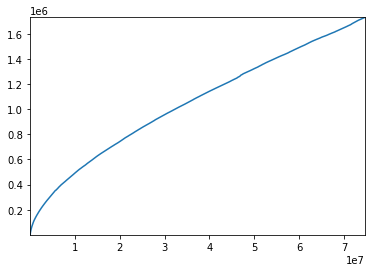

In [13]:
heaps_law(heaps_law_dataset)

## Zipfs Law

In [14]:
import matplotlib.pyplot as plt
import math

def zipfs_law(list_to_graph):
        x = list()
        y = list()
        
        for i, word in enumerate(list_to_graph):
            x.append(i+1)
            y.append(len(inv_idx_ordered[word]))
            

        plt.loglog(x, y)
        plt.savefig("zipfs_law.png")

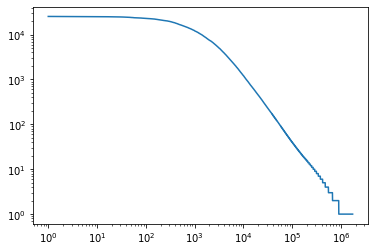

In [15]:
zipfs_law(inv_idx_ordered)

## Finishing Inverted Index

In [16]:
for value in tqdm(inv_idx_ordered.items()):
    inv_idx[value[0]] = ({i:value[1].count(i) for i in value[1]})

100%|█████████████████████████████████████████████████████████████████████| 1730793/1730793 [1:56:42<00:00, 247.17it/s]


In [20]:
file_to_write = open("inv_idx_1000_domain_stop_words.pkl", "wb")

pickle.dump(inv_idx, file_to_write)

In [16]:
term_doc_list = {} # term, list of documents it appears in
term_freq_list = {} # term, frequency
for word in tqdm(vocab):
    term_doc_list[word] = set()
    term_freq_list[word] = 0


100%|████████████████████████████████████████████████████████████████████| 1731793/1731793 [00:11<00:00, 156502.65it/s]


In [18]:
## this approach is too inefficient
for word in tqdm(term_doc_list.keys()):
    for index, row in wiki_dataframe_pickle.iterrows():
        if word in row['tokenized_content']:
            term_doc_list[word] = [].append(row['id'])

    for term in wiki_dataframe_pickle['tokenized_content']:
        if term == word:
            term_freq_list[word] += 1 if term_freq_list[word] >= 0 else 0

  0%|                                                                        | 6/1731793 [06:45<32537:33:42, 67.64s/it]


KeyboardInterrupt: 

In [25]:
# better, but still too inefficient
i = 0
for word in tqdm(term_doc_list.keys()):
    if i == 100:
        break
    i += 1
    result = wiki_dataframe_pickle[wiki_dataframe_pickle.eq(word).any(1)]
result


  0%|                                                                        | 100/1731793 [00:34<166:12:34,  2.89it/s]


,content,title,id,tokenized_content


In [24]:
result

,content,title,id,tokenized_content


In [56]:
inverted_index = pd.DataFrame({"term": vocab,
                               "doc_list": term_doc_list.values(),
                               "frequency":term_freq_list.values()}, columns=['term','doc_list','frequency'])




ValueError: All arrays must be of the same length